In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_table(r"C:\Users\Zerb\Downloads\Data.txt", delimiter = ',')#, nrows=2)
pd.set_option('display.max_rows', None)
#print(df)

# 1

## 1a

Choices are visual cues, one of four. Three of them are locked to a reward, one is "random". From the data it looks like 4 = 10, 3 = 5, 2 = 0/10, 1 = 0.
The participant is learning to estimate Value(stimulus) - V(s)
That means for each stimulus, they are creating a value, then updating that value in response to the strength of the prediction error(PE) and the rate of learning (n)
             V new (s) = V old (s) + η×PE

assume the learning rate n = 0.2, and all variables start at 0. write a program that will compute the values of the stimuli over time in a language of your choice.
v= 0
n = 0.2
PE = |R1 - R2|
v= v + n(PE)

In [2]:
when_3 = df.loc[df['Choices'] == 3]
#print(when_3)
when_1 = df.loc[df['Choices'] == 1]
when_2 = df.loc[df['Choices'] == 2]
when_4 = df.loc[df['Choices'] == 4]

In [3]:
reward = 0 
rf = 0
v = 0
n = 0.2
output3 = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_3.iterrows():
        #PE = abs(row['Rewards']-v)
        PE = row['Rewards']-v
        #print(PE)
       # reward= row['Rewards']
        vf = v + n*PE
        #print(v)
        output3 = pd.concat([output3, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
        v = vf
#print(output3)
#plt.plot(output3.index, output3['vi'])
#plt.xlabel('Instance of Simulus 3')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 3 (all 5)')

In [4]:
reward = 0 
rf = 0
v = 0
n = 0.2
output1 = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_1.iterrows():
        #PE = abs(row['Rewards']-v)
        PE = row['Rewards']-v
        #print(PE)
       # reward= row['Rewards']
        vf = v + n*PE
        #print(v)
        output1 = pd.concat([output1, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
        v = vf
#print(output1)
#plt.plot(output1.index, output1['vi'])
#plt.xlabel('Instance of Simulus 1')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 1 (all 0)')

In [5]:
reward = 0 
rf = 0
v = 0
n = 0.2
output2 = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_2.iterrows():
        PE = row['Rewards']-v
        #print(PE)
       # reward= row['Rewards']
        vf = v + n*PE
        #print(v)
        output2 = pd.concat([output2, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
        v = vf
#print(output2)
#plt.plot(output2.index, output2['vi'])
#plt.xlabel('Instance of Simulus 2')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 2 (all 0/10)')

In [6]:
reward = 0 
rf = 0
v = 0
n = 0.2
output4 = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_4.iterrows():
        #PE = abs(row['Rewards']-v)
        PE = row['Rewards']-v
        #print(PE)
       # reward= row['Rewards']
        vf = v + n*PE
        #print(v)
        output4 = pd.concat([output4, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
        v = vf
#print(output)
#plt.plot(output4.index, output4['vi'])
#plt.xlabel('Instance of Simulus 4')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 4 (all 10)')

Text(0.5, 1.0, 'fig1. Instance to value stim 4 (all 10)')

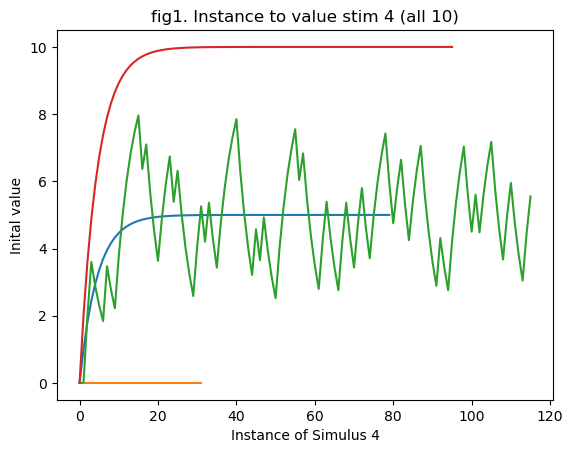

In [7]:
plt.plot(output3.index, output3['vi'])
plt.xlabel('Instance of Simulus 3')
plt.ylabel('Inital value')
plt.title('Instance to value stim 3 (all 5)')

plt.plot(output1.index, output1['vi'])
plt.xlabel('Instance of Simulus 1')
plt.ylabel('Inital value')
plt.title('Instance to value stim 1 (all 0)')

plt.plot(output2.index, output2['vi'])
plt.xlabel('Instance of Simulus 2')
plt.ylabel('Inital value')
plt.title('Instance to value stim 2 (all 0/10)')

plt.plot(output4.index, output4['vi'])
plt.xlabel('Instance of Simulus 4')
plt.ylabel('Inital value')
plt.title('fig1. Instance to value stim 4 (all 10)')

Okay, so the percieved value approaches the actual value, except for the uncertain one, which vacillates (but maybe the vacillation is shrinking? The biggest peaks seem to get smaller and the biggest troughs shallower but I can't really tell with confidence). This makes a lot more sense.

## 1b

Modify your program so that when the prediction error is positive, one learning rate (η+ ) is used, whereas when
it is negative a different learning rate (η- ) is used. What happens when η+ > η- ?
When η- > η+ ? Please think carefully about each of the cues for this question.

In [8]:
reward = 0 
rf = 0
v = 0
n_pos = 0.5
n_neg = 0.1
output2_pos = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_2.iterrows():
    PE = row['Rewards']-v
              #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output2_pos = pd.concat([output2_pos, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output2)
#plt.plot(output2.index, output2['vi'])
#plt.xlabel('Instance of Simulus 2')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 2 (all 0/10) non absolute higher pos')

In [9]:
reward = 0 
rf = 0
v = 0
n_pos = 0.1
n_neg =0.5
output2_neg = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_2.iterrows():
    PE = row['Rewards']-v
        #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output2_neg = pd.concat([output2_neg, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output2)
#plt.plot(output2.index, output2['vi'])
#plt.xlabel('Instance of Simulus 2')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 2 (all 0/10) non absolute higher neg')

In [10]:
reward = 0 
rf = 0
v = 0
n_pos = 0.5
n_neg = 0.1
output4_pos = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_4.iterrows():
    #PE = abs(row['Rewards']-v)
    PE = row['Rewards']-v
        #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output4_pos = pd.concat([output4_pos, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output4)
#plt.plot(output4.index, output4['vi'])
#plt.xlabel('Instance of Simulus 4')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 4 (all 10)')

In [11]:
reward = 0 
rf = 0
v = 0
n_pos =0.1
n_neg =0.5
output4_neg = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_4.iterrows():
    #PE = abs(row['Rewards']-v)
    PE = row['Rewards']-v
        #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output4_neg = pd.concat([output4_neg, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output4)
#plt.plot(output4.index, output4['vi'])
#plt.xlabel('Instance of Simulus 4')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 4 (all 10)')

In [12]:
reward = 0 
rf = 0
v = 0
n_pos = 1
n_neg = 0
output3_pos = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_3.iterrows():
    #PE = abs(row['Rewards']-v)
    PE = row['Rewards']-v
        #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output3_pos = pd.concat([output3_pos, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output3)
#plt.plot(output3.index, output3['vi'])
#plt.xlabel('Instance of Simulus 3')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 3 (all 5)')

In [13]:
reward = 0 
rf = 0
v = 0
n_pos = 0
n_neg = 1
output3_neg = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_3.iterrows():
    #PE = abs(row['Rewards']-v)
    PE = row['Rewards']-v
        #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output3_neg = pd.concat([output3_neg, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output1)
#plt.plot(output1.index, output1['vi'])
#plt.xlabel('Instance of Simulus 1')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 1 (all 0)')

Text(0.5, 1.0, 'fig2 Instance to value stim 1 (all 0)')

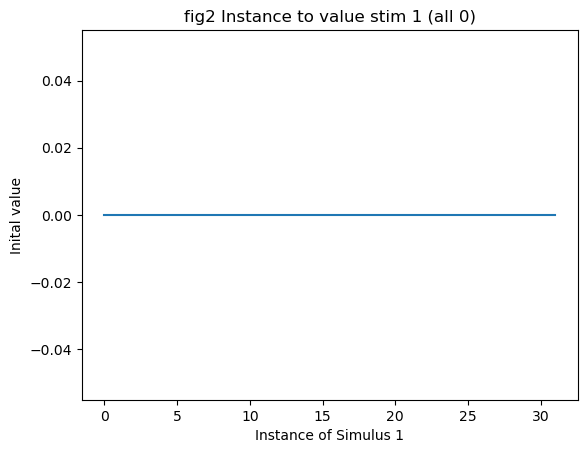

In [28]:
reward = 0 
rf = 0
v = 0
n_pos = 1
n_neg = 0
output1 = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_1.iterrows():
    #PE = abs(row['Rewards']-v)
    PE = row['Rewards']-v
        #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output1 = pd.concat([output1, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output1)
plt.plot(output1.index, output1['vi'])
plt.xlabel('Instance of Simulus 1')
plt.ylabel('Inital value')
plt.title('fig2 Instance to value stim 1 (all 0)')

Text(0.5, 1.0, 'fig 3 Instance to value stim 2 (all 0/10)')

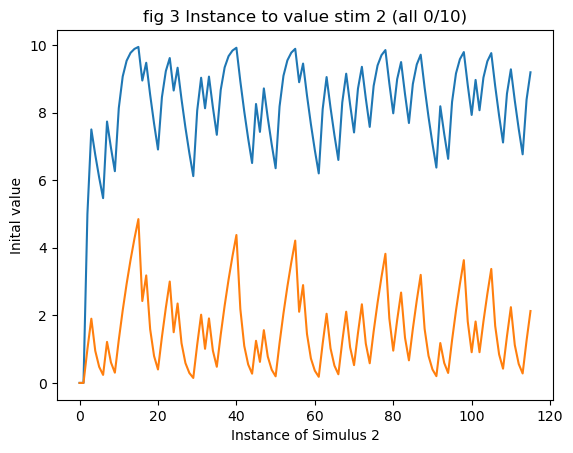

In [29]:
plt.plot(output2_pos.index, output2_pos['vi'])
plt.xlabel('Instance of Simulus 2')
plt.ylabel('Inital value')
plt.title('Instance to value stim 2 (all 0/10)')

plt.plot(output2_neg.index, output2_neg['vi'])
plt.xlabel('Instance of Simulus 2')
plt.ylabel('Inital value')
plt.title('fig 3 Instance to value stim 2 (all 0/10)')

Text(0.5, 1.0, ' fig 4 Instance to value stim 3 (all 5), maximum ratio')

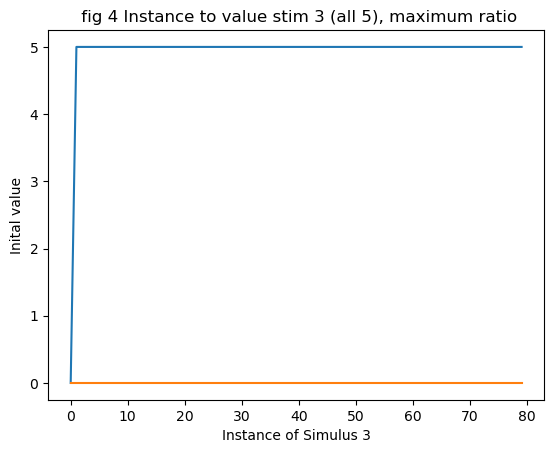

In [30]:
plt.plot(output3_pos.index, output3_pos['vi'])
plt.xlabel('Instance of Simulus 3')
plt.ylabel('Inital value')
plt.title('Instance to value stim 3 (all 5)')

plt.plot(output3_neg.index, output3_neg['vi'])
plt.xlabel('Instance of Simulus 3')
plt.ylabel('Inital value')
plt.title(' fig 4 Instance to value stim 3 (all 5), maximum ratio')

Text(0.5, 1.0, 'fig5 Instance to value stim 4 (all 10) 0.1:0.5 ratio')

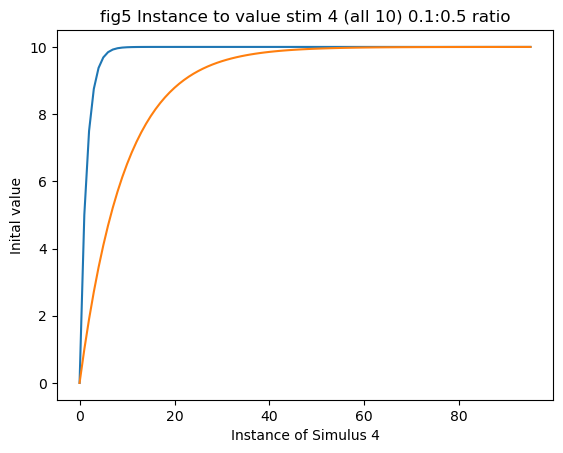

In [31]:
plt.plot(output4_pos.index, output4_pos['vi'])
plt.xlabel('Instance of Simulus 4')
plt.ylabel('Inital value')
plt.title('Instance to value stim 4 (all 10)')

plt.plot(output4_neg.index, output4_neg['vi'])
plt.xlabel('Instance of Simulus 4')
plt.ylabel('Inital value')
plt.title('fig5 Instance to value stim 4 (all 10) 0.1:0.5 ratio')

## 1b written
When the learning rate is constant, the percieved value approaches the actual value, except for the uncertain one, which vacillates, but the vacillation is around/shrinking to the average. 

When n+ > n- (positive learning rate is higher valued than negative learning rate in response to prediction error), constant positive values (10, 5) are learned faster, and the vacillation of the 50/50 0/10 reward evaluation averages to higher than the objective evaluation of 5.  

When n- >n+ (negative learning rate is higher valued than positive in response to prediction error), constant positive values are learned slower (but constant negative values faster), and the vacillation of the second trial averages below the objective evaluation of 5. 

#This has definite applications to psychological study of perceptual biases in healthy and cognitively disordered people. I also understand how this would look like on a neuronal systems level in less complex species, but I'm definitely interested in the intermediate, cognitive/network levels. How, functionally, are these biases enacted in the context of disorders of ruminating about social perception?#

## 1c written

A person with a positive learning rate bias will choose the riskier (0/10) option, because they're percieving the average reward to be higher than 5 cents. A person with a negative learning rate bias will choose the less risky constant 5 cents, because the 0/10 is percieved as a lower reward. 

#I wonder if with enough data/testing their average will start to trend towards the real average. Ie, I wonder if there's a version of this formula that accounts for a person reviewing the results and adjusting their learning biases to fit. I think I remember Niv lab having a paper related to this.#

# 2
Option a: 0.01
Option b: 0, 1% chance of 1


I think people with a positivity bias would risk taking longer to learn the outcomes of the two stimuli. A person with a negative bias would quickly value option a > option b and stop testing both at equal rates. (In these examples we're assuming the learner's inital assumption is zero, but this also may not be the case, and would make them significantly more likely to take risks.)

#### n=n
An assumption I am making is that participants stop testing option b when the predicted value of a is equal to the actual value (high confidence), and not as soon as the predicted value of a passes that of b. As seen in Question 1a, someone with a net learning bias of 0.2 stopping testing at 20 trials, not 2 or less. This is how I conclude that an n=n person would need a net bias of around 1 to discover the relationship between a and b.

#### n_pos>n_neg or n_neg>n_pos
If in their first few tests the participats get a dollar, it will take more than 100 zeroes (proportionate to learning rate) following this output for the positively biased learner to begin to value option a > option b. The negative biased learner will take less than 100 zeroes to do so (proportionate to their learning rate), following which, they will stop taking this option.

The positively biased person is more likely in this case to discover that option a = option b, because they will have more data to review. The negatively biased person will only reach this conclusion if they are initally very lucky, and by chance overvalue option b and decrease to the real average. As this is a very low chance, however, the person's positive learning bias would need to average very high to encounter it.

#### n_pos to n_neg ratio
Given the mathematical relationship, I think I could perhaps use the quadratic formula to figure this out. There's going to be a point of positive learning bias (equivalent to n=n=1) where the chance of occurance > chance of giving up. I suspect it's a relatively high positive bias in the context of positively biased people. So closer to 1:0.1 than 0.2:0.1 - a more distinct difference between positive and negative learning rates. 

This assuption however does not gel well with my assumption that people will stop testing when they reach a high confidence, because then a negative bias reducing their rate of confidence would give a longer period of time in which the value of both are uncertain, as seen in fig 5. 

So really the answer to this question depends on the definition of "the option that they think has highest value" - how confident do they have to be to _always_ choose this option? Is the assumption of value starting from 1 and falling, or zero and rising? Both of these questions significantly impact the amount of tests the person will do, and therefore the possible occurance of a 1 in this span of time.



# 3 

If Option a: 0.01
Option b: 0, 10% chance of 1
:. the net value of option b is 0.10

Then over a long enough period of testing, option b> option a. A positively biased person is very likely to discover this relationship, as is the n=n person. However, this again assumes that they stop testing option b when the predicted value of a is = actual value, and not as soon as the predicted value of a passes that of b. It also again assumes that a negative learning bias will predispose someone to quitting sooner because they assume the undertain one is lower, rather than being so unconfident in both options they test both to excess.

Roughly 1 in 10 of all people will start with the assumption that option b>a, and never be dissuaded of it. 

If Option a: 0.01
Option b: 0, 50% chance of 1
:. the net value of option b is 0.50

At this point, the vast majority of participants should value b>a. 

### further data exploration

In [18]:
new_row = {'Choices': 3, 'Rewards': -3.0}
insert_position = len(when_3) // 2 
when_3_mean = pd.concat([when_3.iloc[:insert_position], pd.DataFrame(new_row, index=[insert_position]), when_3.iloc[insert_position:]]).reset_index(drop=True)
#print(when_3_mean)

In [19]:
reward = 0 
rf = 0
v = 0
n_pos = 0.2
n_neg = 0.1
output3_mean = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_3_mean.iterrows():
    PE = abs(row['Rewards']-v)
        #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output3_mean = pd.concat([output3_mean, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output3_mean)
#plt.plot(output3_mean.index, output3_mean['vi'])
#plt.xlabel('Instance of Simulus 3')
#plt.ylabel('Inital value')
#plt.title('Instance to value of stim 3 when one of the trials is negative')

In [20]:
reward = 0 
rf = 0
v = 0
n_pos = 0.2
n_neg = 0.1
output3_mean = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_3_mean.iterrows():
    PE = row['Rewards']-v
        #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output3_mean = pd.concat([output3_mean, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output3_mean)
#plt.plot(output3_mean.index, output3_mean['vi'])
#plt.xlabel('Instance of Simulus 3')
#plt.ylabel('Inital value')
#plt.title('Instance to value of stim 3 when one of the trials is negative non absolute')

In [21]:
reward = 0 
rf = 0
v = 0
n_pos = 0.2
n_neg = 0.1
output3_meanest = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_3_mean.iterrows():
    PE = abs(-row['Rewards']-v)
        #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output3_meanest = pd.concat([output3_meanest, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output3_meanest)
#plt.plot(output3_meanest.index, output3_meanest['vi'])
#plt.xlabel('Instance of Simulus 3')
#plt.ylabel('Inital value')
#plt.title('Instance to value of stim 3 when all rewards negative')

In [22]:
reward = 0 
rf = 0
v = 0
n_pos = 0.5
n_neg = 0.1
output3_meanest_pos = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_3.iterrows():
    PE = -row['Rewards']-v
        #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output3_meanest_pos = pd.concat([output3_meanest_pos, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output3_meanest)
#plt.plot(output3_meanest.index, output3_meanest['vi'])
#plt.xlabel('Instance of Simulus 3')
#plt.ylabel('Inital value')
#plt.title('Instance to value of stim 3 when all rewards negative but with a cheery disposition')

In [23]:
reward = 0 
rf = 0
v = 0
n_pos = 0.1
n_neg = 0.5
output3_meanest_neg = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_3.iterrows():
    PE = -row['Rewards']-v
        #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output3_meanest_neg = pd.concat([output3_meanest_neg, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output3_meanest)
#plt.plot(output3_meanest.index, output3_meanest['vi'])
#plt.xlabel('Instance of Simulus 3')
#plt.ylabel('Inital value')
#plt.title('Instance to value of stim 3 when all rewards negative but with a glum disposition')

Text(0.5, 1.0, 'Instance to value of stim 3 when all rewards negative')

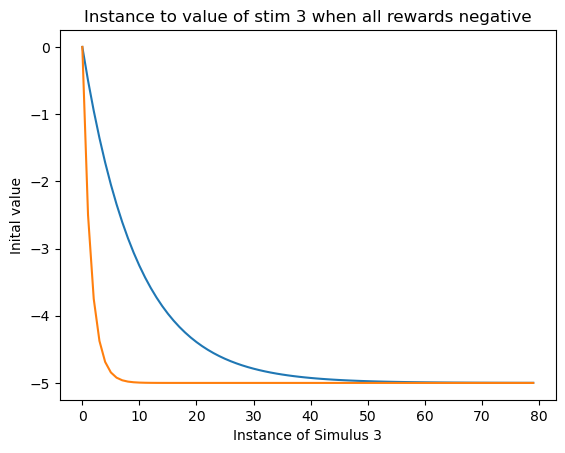

In [24]:
plt.plot(output3_meanest_pos.index, output3_meanest_pos['vi'])
plt.xlabel('Instance of Simulus 3')
plt.ylabel('Inital value')
plt.title('Instance to value of stim 3 when all rewards negative')

plt.plot(output3_meanest_neg.index, output3_meanest_neg['vi'])
plt.xlabel('Instance of Simulus 3')
plt.ylabel('Inital value')
plt.title('Instance to value of stim 3 when all rewards negative')

### Double checking to make sure 'absolute difference' isn't what's meant


In [25]:
reward = 0 
rf = 0
v = 0
n = 0.2
output2 = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_2.iterrows():
        PE = abs(row['Rewards']-v)
        #print(PE)
       # reward= row['Rewards']
        vf = v + n*PE
        #print(v)
        output2 = pd.concat([output2, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
        v = vf
#print(output2)
#plt.plot(output2.index, output2['vi'])
#plt.xlabel('Instance of Simulus 2')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 2 absolute')

As there is an occassional highly negative change in PE, there is a significant difference between the absolute and non absolute calculations of this data. 

In [26]:
reward = 0 
rf = 0
v = 0
n_pos = 0.3
n_neg = 0.1
output2 = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_2.iterrows():
    PE = abs(row['Rewards']-v)
              #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output2 = pd.concat([output2, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output2)
#plt.plot(output2.index, output2['vi'])
#plt.xlabel('Instance of Simulus 2')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 2 absolute higher pos')

In [27]:
reward = 0 
rf = 0
v = 0
n_pos = 0.1
n_neg = 0.3
output2 = pd.DataFrame(columns=['trial','vi', 'PE', 'vf'])
for index, row in when_2.iterrows():
    PE = abs(row['Rewards']-v)
        #print(PE)
       # reward= row['Rewards'] 
    if PE > 0:
        vf = v + n_pos * PE
    else:
        vf = v + n_neg * PE  
    #print(v)
    output2 = pd.concat([output2, pd.DataFrame({'trial': [index], 'vi': [v], 'PE': [PE], 'vf': [vf]})], ignore_index=True)
    v = vf
#print(output2)
#plt.plot(output2.index, output2['vi'])
#plt.xlabel('Instance of Simulus 2')
#plt.ylabel('Inital value')
#plt.title('Instance to value stim 2 absolute higher neg')